In [3]:
import numpy as np
import matplotlib.pyplot as plt

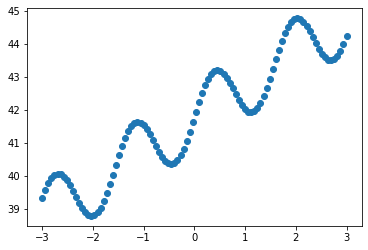

In [4]:
N = 100 # 100 samples
x = np.linspace(-3, 3, N) # coordinates
noise_sample = np.random.RandomState(20)  # constant random value
# growing sinusoid with random fluctuation
sine_wave = x + np.sin(4*x) + noise_sample.uniform(N)
plt.plot(x,sine_wave, 'o')
plt.show()

Before:  (100,)
(100, 1)


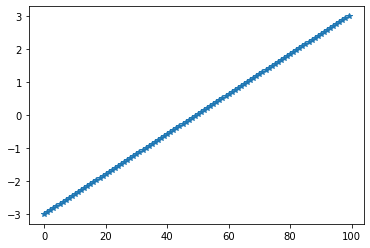

In [5]:
print('Before: ', x.shape)
features = x[:, np.newaxis] # transformation en 2D
print(features.shape)
plt.plot(features,'*')

Modèle de régression

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


Accuracy for training data (self accuracy): 0.829882748059623
Accuracy for test data: 0.8572065562342835


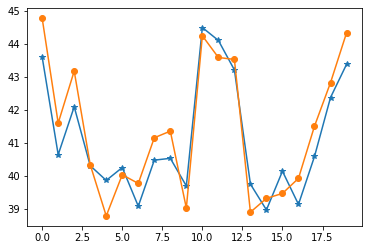

In [7]:
targets = sine_wave
# division de la base de donnees en base de test et de train
train_features, test_features, train_targets, test_targets = train_test_split(
        features, targets,
        train_size=0.8,
        test_size=0.2,
        random_state=2)
# entrainement du modele avec la base de train
regressor=LinearRegression()
regressor.fit(train_features,train_targets)
prediction_training_targets=regressor.predict(train_features)

# prediction et evaluatioin avec les donnees d'entrainnement 
self_accuracy = regressor.score(train_features, train_targets)
print("Accuracy for training data (self accuracy):", self_accuracy)

# prediction et evaluation avec les donnees de teste 
prediction_test_targets = regressor.predict(test_features)
test_accuracy = regressor.score(test_features, test_targets)
print("Accuracy for test data:", test_accuracy)

# AFFRICHAGE DES PREDICTIONS DE LA CIBLE AVEC LES DONNEES DE TESTE
plt.plot(prediction_test_targets, '-*')
plt.plot(test_targets, '-o' )
plt.show()

Validation croisée

In [8]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [9]:
# IMPORTATION DES DONNEES IRIS
iris = load_iris()

In [10]:
# les facteurs(features) et les cibles(target)
features, targets = iris.data, iris.target
print(features.shape)
print(targets.shape)

train_features, test_features, train_targets, test_targets = train_test_split(
        features, targets,
        train_size=0.8,
        test_size=0.2,
        stratify=targets)

# modele de KNeighbors KNN
classifier = KNeighborsClassifier()
classifier.fit(train_features, train_targets)

# PREDICTION DE LA CIBLE  AVEC LES DONNEES DE TESTE 
prediction_targets = classifier.predict(test_features)

print("Accuracy:", end=' ')
print(np.sum(prediction_targets == test_targets) / float(len(test_targets)))

(150, 4)
(150,)
Accuracy: 0.9666666666666667


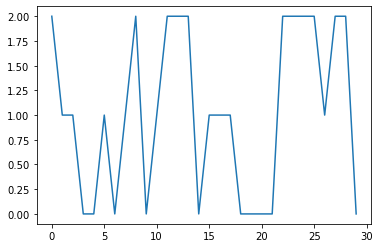

In [11]:
plt.plot(prediction_targets)
